In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('HRDataset_v14.csv')

In [5]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [6]:
# empl_na, postion, department, emp_satisfaction          

In [7]:
df = data[['Employee_Name','Position','Department','EmpSatisfaction']]

In [8]:
df.head()

,Employee_Name,Position,Department,EmpSatisfaction
0,"Adinolfi, Wilson K",Production Technician I,Production,5
1,"Ait Sidi, Karthikeyan",Sr. DBA,IT/IS,3
2,"Akinkuolie, Sarah",Production Technician II,Production,3
3,"Alagbe,Trina",Production Technician I,Production,5
4,"Anderson, Carol",Production Technician I,Production,4


In [9]:
df = df.rename(columns={
    'Employee_Name': "name",
    'Position' : "position",
    'Department' : "domain",
    'EmpSatisfaction' : "years_exp"
})

In [10]:
df.head()

,name,position,domain,years_exp
0,"Adinolfi, Wilson K",Production Technician I,Production,5
1,"Ait Sidi, Karthikeyan",Sr. DBA,IT/IS,3
2,"Akinkuolie, Sarah",Production Technician II,Production,3
3,"Alagbe,Trina",Production Technician I,Production,5
4,"Anderson, Carol",Production Technician I,Production,4


In [11]:
df.to_csv('clean_hr.csv')

In [12]:
df.isnull().sum()

name         0
position     0
domain       0
years_exp    0
dtype: int64

In [13]:
from matplotlib import pyplot as plt
import seaborn as snb

In [14]:
y = [i for i in range(len(df['years_exp']))]

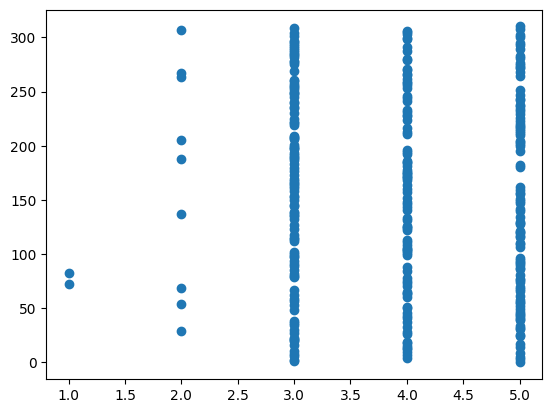

In [15]:
plt.scatter(x = df['years_exp'], y = y)

In [16]:
df

,name,position,domain,years_exp
0,"Adinolfi, Wilson K",Production Technician I,Production,5
1,"Ait Sidi, Karthikeyan",Sr. DBA,IT/IS,3
2,"Akinkuolie, Sarah",Production Technician II,Production,3
3,"Alagbe,Trina",Production Technician I,Production,5
4,"Anderson, Carol",Production Technician I,Production,4
...,...,...,...,...
306,"Woodson, Jason",Production Technician II,Production,4
307,"Ybarra, Catherine",Production Technician I,Production,2
308,"Zamora, Jennifer",CIO,IT/IS,5
309,"Zhou, Julia",Data Analyst,IT/IS,3


In [17]:
def name_transform(text):
    l1 = text.split(',')
    l1 = [i.strip() for i in l1]
    return l1

In [18]:
print(name_transform(df['name'][0]))

df['name'] = df['name'].apply(name_transform)

['Adinolfi', 'Wilson  K']


In [19]:
name1 = []
name2 = []

In [20]:
for user1 in df['name']:
    name1.append(user1[0])
    name2.append(user1[1])

In [21]:
df['name1'] = name1
df['name2'] = name2

In [22]:
df

,name,position,domain,years_exp,name1,name2
0,"[Adinolfi, Wilson K]",Production Technician I,Production,5,Adinolfi,Wilson K
1,"[Ait Sidi, Karthikeyan]",Sr. DBA,IT/IS,3,Ait Sidi,Karthikeyan
2,"[Akinkuolie, Sarah]",Production Technician II,Production,3,Akinkuolie,Sarah
3,"[Alagbe, Trina]",Production Technician I,Production,5,Alagbe,Trina
4,"[Anderson, Carol]",Production Technician I,Production,4,Anderson,Carol
...,...,...,...,...,...,...
306,"[Woodson, Jason]",Production Technician II,Production,4,Woodson,Jason
307,"[Ybarra, Catherine]",Production Technician I,Production,2,Ybarra,Catherine
308,"[Zamora, Jennifer]",CIO,IT/IS,5,Zamora,Jennifer
309,"[Zhou, Julia]",Data Analyst,IT/IS,3,Zhou,Julia


In [23]:
df1 = df[['name1','position','domain','years_exp']].rename(columns={'name1' : 'name'})
df2 = df[['name2','position','domain','years_exp']].rename(columns={'name2' : 'name'})

In [24]:
main_df = pd.concat([df1, df2], ignore_index=True)

In [25]:
main_df

,name,position,domain,years_exp
0,Adinolfi,Production Technician I,Production,5
1,Ait Sidi,Sr. DBA,IT/IS,3
2,Akinkuolie,Production Technician II,Production,3
3,Alagbe,Production Technician I,Production,5
4,Anderson,Production Technician I,Production,4
...,...,...,...,...
617,Jason,Production Technician II,Production,4
618,Catherine,Production Technician I,Production,2
619,Jennifer,CIO,IT/IS,5
620,Julia,Data Analyst,IT/IS,3


In [26]:
from random import randint
# randint(1000000000, 9999999999)

contact = []

for _ in range(len(main_df)):
    contact.append(randint(1000000000, 9999999999))

In [27]:
len(contact)

622

In [28]:
main_df['contact'] = contact

In [29]:
main_df

,name,position,domain,years_exp,contact
0,Adinolfi,Production Technician I,Production,5,2428020878
1,Ait Sidi,Sr. DBA,IT/IS,3,1176460356
2,Akinkuolie,Production Technician II,Production,3,4876338400
3,Alagbe,Production Technician I,Production,5,3481948817
4,Anderson,Production Technician I,Production,4,1177490977
...,...,...,...,...,...
617,Jason,Production Technician II,Production,4,6178582648
618,Catherine,Production Technician I,Production,2,1595798993
619,Jennifer,CIO,IT/IS,5,8163494187
620,Julia,Data Analyst,IT/IS,3,1715387089


In [30]:
main_df.to_csv('clean_hr.csv')

In [31]:
# remove space
# lowercase

In [32]:
main_df = pd.read_csv('clean_hr.csv')

In [33]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from string import punctuation
ps = PorterStemmer()

In [34]:
main_df['position'] = main_df['position'].replace("Production Technician II", "datascientist")
main_df['position'] = main_df['position'].replace("Production Technician I", "technician")
main_df['position'] = main_df['position'].replace("Area Sales Manager", "devops")
main_df['position'] = main_df['position'].replace("Senior BI Developer", "cloudengineer")

In [35]:
main_df

,Unnamed: 0,name,position,domain,years_exp,contact
0,0,Adinolfi,technician,Production,5,2428020878
1,1,Ait Sidi,Sr. DBA,IT/IS,3,1176460356
2,2,Akinkuolie,datascientist,Production,3,4876338400
3,3,Alagbe,technician,Production,5,3481948817
4,4,Anderson,technician,Production,4,1177490977
...,...,...,...,...,...,...
617,617,Jason,datascientist,Production,4,6178582648
618,618,Catherine,technician,Production,2,1595798993
619,619,Jennifer,CIO,IT/IS,5,8163494187
620,620,Julia,Data Analyst,IT/IS,3,1715387089


In [36]:
def text_transform(text: str):
    text = text.lower()
    tokens = word_tokenize(text)
    return " ".join(tokens)

In [37]:
def text_transfer(text : str):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stopwords.words('english') and token not in punctuation]
    tokens = [ps.stem(token) for token in tokens]
    
    return " ".join(tokens)

In [38]:
main_df.head()

,Unnamed: 0,name,position,domain,years_exp,contact
0,0,Adinolfi,technician,Production,5,2428020878
1,1,Ait Sidi,Sr. DBA,IT/IS,3,1176460356
2,2,Akinkuolie,datascientist,Production,3,4876338400
3,3,Alagbe,technician,Production,5,3481948817
4,4,Anderson,technician,Production,4,1177490977


In [39]:
main_df['position'] = main_df['position'].apply(text_transform)
main_df['domain'] = main_df['domain'].apply(text_transform)

In [40]:
main_df['position'] + " " + main_df['domain']

0         technician production
1                 sr. dba it/is
2      datascientist production
3         technician production
4         technician production
                 ...           
617    datascientist production
618       technician production
619                   cio it/is
620          data analyst it/is
621       technician production
Length: 622, dtype: object

In [41]:
list(pd.get_dummies(main_df['position']).columns)

['accountant i',
 'administrative assistant',
 'bi developer',
 'bi director',
 'cio',
 'cloudengineer',
 'data analyst',
 'data architect',
 'database administrator',
 'datascientist',
 'devops',
 'director of operations',
 'director of sales',
 'enterprise architect',
 'it director',
 'it manager - db',
 'it manager - infra',
 'it manager - support',
 'it support',
 'network engineer',
 'president & ceo',
 'principal data architect',
 'production manager',
 'sales manager',
 'shared services manager',
 'software engineer',
 'software engineering manager',
 'sr. accountant',
 'sr. dba',
 'sr. network engineer',
 'technician']

In [42]:
position_tags = {
    'accountant i': ['accounting', 'finance', 'financial reporting', 'bookkeeping', 'audit', 'taxation', 'budgeting', 'payroll', 'financial analysis', 'account reconciliation', 'GAAP', 'Excel', 'QuickBooks', 'CPA', 'financial statements', 'accounts payable', 'accounts receivable', 'cash flow', 'income statement', 'balance sheet'],
    'administrative assistant': ['office administration', 'clerical', 'communication skills', 'organizational skills', 'time management', 'scheduling', 'filing', 'data entry', 'Microsoft Office', 'customer service', 'email management', 'calendar management', 'record keeping', 'multitasking', 'administrative support', 'problem solving', 'teamwork', 'attention to detail', 'professionalism', 'office equipment'],
    'bi developer': ['business intelligence', 'ETL', 'data warehousing', 'SQL', 'data modeling', 'reporting', 'data visualization', 'dashboard development', 'ETL tools', 'data analysis', 'database management', 'data integration', 'Python', 'R', 'tableau', 'business analysis', 'OLAP', 'dimensional modeling', 'data mining', 'data architecture'],
    'bi director': ['business intelligence', 'leadership', 'strategic planning', 'business strategy', 'data analytics', 'team management', 'budget management', 'project management', 'data-driven decision making', 'business development', 'stakeholder management', 'data governance', 'executive reporting', 'business acumen', 'communication skills', 'problem solving', 'cross-functional collaboration', 'change management', 'decision support', 'KPIs'],
    'cio': ['chief information officer', 'IT leadership', 'technology strategy', 'IT governance', 'digital transformation', 'enterprise architecture', 'IT management', 'strategic planning', 'cybersecurity', 'business alignment', 'innovation', 'vendor management', 'budget management', 'project management', 'IT infrastructure', 'cloud computing', 'data management', 'risk management', 'business continuity', 'leadership'],
    'cloudengineer': ['cloud computing', 'AWS', 'Azure', 'Google Cloud', 'DevOps', 'infrastructure as code', 'automation', 'containerization', 'Kubernetes', 'CI/CD', 'networking', 'security', 'serverless architecture', 'scripting', 'monitoring', 'scalability', 'high availability', 'deployment', 'Linux', 'Python'],
    'data analyst': ['data analysis', 'SQL', 'data visualization', 'Excel', 'statistics', 'data cleaning', 'data interpretation', 'reporting', 'problem solving', 'critical thinking', 'quantitative analysis', 'data manipulation', 'dashboard creation', 'business analysis', 'data mining', 'data modeling', 'Python', 'R', 'tableau', 'data validation'],
    'data architect': ['data architecture', 'database design', 'data modeling', 'ETL', 'data integration', 'data governance', 'data warehouse', 'big data', 'cloud computing', 'SQL', 'NoSQL', 'data migration', 'data standards', 'metadata management', 'data security', 'data strategy', 'data quality', 'enterprise architecture', 'business intelligence', 'data lake'],
    'database administrator': ['database management', 'SQL', 'database design', 'database tuning', 'backup and recovery', 'data integrity', 'data security', 'performance monitoring', 'query optimization', 'database administration tools', 'data modeling', 'troubleshooting', 'high availability', 'data migration', 'NoSQL', 'ETL', 'relational databases', 'MySQL', 'Oracle', 'Microsoft SQL Server'],
    'datascientist': ['data science', 'machine learning', 'Python', 'R', 'data analysis', 'statistics', 'predictive modeling', 'data mining', 'data visualization', 'deep learning', 'natural language processing', 'AI', 'feature engineering', 'experimentation', 'model evaluation', 'big data', 'Hadoop', 'Spark', 'data preprocessing', 'neural networks'],
    'devops': ['DevOps', 'CI/CD', 'automation', 'continuous integration', 'continuous deployment', 'cloud computing', 'containerization', 'Kubernetes', 'Infrastructure as Code', 'scripting', 'monitoring', 'deployment', 'scalability', 'agile methodology', 'Git', 'Jenkins', 'Docker', 'Ansible', 'AWS', 'Azure'],
    'director of operations': ['operations management', 'leadership', 'strategic planning', 'team management', 'process improvement', 'budget management', 'project management', 'cross-functional collaboration', 'performance metrics', 'risk management', 'change management', 'supply chain management', 'logistics', 'inventory management', 'quality control', 'lean manufacturing', 'six sigma', 'continuous improvement', 'decision making', 'business acumen'],
    'director of sales': ['sales management', 'leadership', 'strategic planning', 'business development', 'sales strategy', 'team management', 'client relationship management', 'customer acquisition', 'sales forecasting', 'territory management', 'negotiation', 'sales training', 'market analysis', 'competitive analysis', 'customer satisfaction', 'key account management', 'pipeline management', 'budget management', 'performance metrics', 'CRM'],
    'enterprise architect': ['enterprise architecture', 'IT architecture', 'strategic planning', 'business alignment', 'IT governance', 'technology roadmap', 'digital transformation', 'cloud computing', 'IT standards', 'solution architecture', 'application architecture', 'data architecture', 'infrastructure architecture', 'security architecture', 'integration architecture', 'enterprise integration', 'TOGAF', 'business process modeling', 'enterprise systems', 'technical leadership'],
    'it director': ['IT management', 'leadership', 'strategic planning', 'project management', 'budget management', 'team management', 'IT governance', 'vendor management', 'technology roadmap', 'IT infrastructure', 'IT strategy', 'cybersecurity', 'cloud computing', 'business continuity', 'risk management', 'change management', 'stakeholder management', 'business alignment', 'ITIL', 'IT service management'],
    'it manager - db': ['database management', 'SQL', 'database administration', 'performance tuning', 'data security', 'backup and recovery', 'database design', 'query optimization', 'data integrity', 'troubleshooting', 'database migration', 'high availability', 'relational databases', 'NoSQL', 'MySQL', 'Oracle', 'Microsoft SQL Server', 'ETL', 'data modeling', 'database monitoring'],
    'it manager - infra': ['IT infrastructure', 'networking', 'system administration', 'cloud computing', 'virtualization', 'IT security', 'server management', 'disaster recovery', 'capacity planning', 'IT architecture', 'data center management', 'network security', 'firewalls', 'routing and switching', 'IT operations', 'incident management', 'change management', 'ITIL', 'automation', 'scalability'],
    'it manager - support': ['IT support', 'helpdesk management', 'technical support', 'troubleshooting', 'ticketing systems', 'end-user support', 'hardware/software installation', 'remote support', 'customer service', 'incident management', 'problem solving', 'team management', 'service level agreements', 'user training', 'ITIL', 'escalation management', 'knowledge management', 'IT policies', 'asset management', 'system updates'],
    'it support': ['IT support', 'technical support', 'troubleshooting', 'helpdesk support', 'hardware/software installation', 'network troubleshooting', 'end-user support', 'customer service', 'ticketing systems', 'remote support', 'problem solving', 'software updates', 'system maintenance', 'computer repair', 'user training', 'ITIL', 'incident management', 'knowledge base', 'IT policies', 'asset management'],
    'network engineer': ['networking', 'routing and switching', 'TCP/IP', 'LAN/WAN', 'firewalls', 'network security', 'Cisco', 'Juniper', 'DNS', 'DHCP', 'VPN', 'wireless networking', 'network monitoring', 'network troubleshooting', 'network protocols', 'subnetting', 'load balancing', 'IPv4', 'IPv6', 'CCNA'],
    'president & ceo': ['executive leadership', 'strategic planning', 'business strategy', 'entrepreneurship', 'visionary leadership', 'organizational management', 'executive management', 'business development', 'corporate governance', 'board relations', 'financial management', 'leadership development', 'change management', 'stakeholder management', 'executive decision making', 'public speaking', 'crisis management', 'mergers and acquisitions', 'industry knowledge', 'innovation'],
    'principal data architect': ['data architecture', 'data modeling', 'ETL', 'data integration', 'data governance', 'big data', 'cloud computing', 'SQL', 'NoSQL', 'data migration', 'data standards', 'metadata management', 'data security', 'data strategy', 'data quality', 'enterprise architecture', 'business intelligence', 'data lake', 'technical leadership', 'solution architecture'],
    'production manager': ['production management', 'manufacturing', 'operations management', 'lean manufacturing', 'process improvement', 'team management', 'budget management', 'scheduling', 'quality control', 'inventory management', 'supply chain management', 'performance metrics', 'continuous improvement', 'problem solving', 'cross-functional collaboration', 'workforce management', 'production planning', 'safety management', 'root cause analysis', 'Kaizen'],
    'sales manager': ['sales management', 'sales strategy', 'team management', 'business development', 'sales forecasting', 'client relationship management', 'territory management', 'negotiation', 'sales training', 'performance management', 'customer acquisition', 'market analysis', 'competitive analysis', 'customer satisfaction', 'key account management', 'pipeline management', 'budget management', 'CRM', 'coaching', 'leadership'],
    'shared services manager': ['shared services', 'process improvement', 'operations management', 'service delivery', 'team management', 'budget management', 'stakeholder management', 'performance metrics', 'continuous improvement', 'vendor management', 'outsourcing', 'service level agreements', 'change management', 'project management', 'cross-functional collaboration', 'problem solving', 'business process outsourcing', 'customer service', 'leadership', 'communication skills'],
    'software engineer': ['software development', 'programming', 'algorithm', 'object-oriented programming', 'Python', 'Java', 'C++', 'web development', 'database management', 'software design', 'agile methodology', 'testing', 'debugging', 'version control', 'software architecture', 'problem solving', 'data structures', 'cloud computing', 'RESTful APIs', 'Git'],
    'software engineering manager': ['software development', 'team management', 'leadership', 'project management', 'software architecture', 'agile methodology', 'budget management', 'performance management', 'problem solving', 'technical leadership', 'software design', 'cross-functional collaboration', 'continuous integration', 'continuous deployment', 'code review', 'release management', 'product development', 'Scrum', 'Kanban', 'communication skills'],
    'sr. accountant': ['accounting', 'finance', 'financial reporting', 'auditing', 'taxation', 'budgeting', 'financial analysis', 'GAAP', 'financial statements', 'account reconciliation', 'CPA', 'Excel', 'accounting software', 'cash flow analysis', 'forecasting', 'cost accounting', 'internal controls', 'VAT', 'IFRS'],
    'sr. dba': ['database administration', 'SQL', 'database management', 'performance tuning', 'backup and recovery', 'data integrity', 'troubleshooting', 'high availability', 'database design', 'NoSQL', 'ETL', 'data modeling', 'data warehousing', 'relational databases', 'MySQL', 'Oracle', 'Microsoft SQL Server', 'database security', 'data migration', 'query optimization'],
    'sr. network engineer': ['network engineering', 'network design', 'routing and switching', 'firewalls', 'network security', 'Cisco', 'Juniper', 'TCP/IP', 'LAN/WAN', 'DNS', 'DHCP', 'VPN', 'wireless networking', 'network troubleshooting', 'network monitoring', 'network protocols', 'load balancing', 'IPv4', 'IPv6', 'CCNP', 'CCIE'],
    'technician': ['technical support', 'troubleshooting', 'hardware/software installation', 'repair', 'maintenance', 'customer service', 'diagnostics', 'problem solving', 'computer hardware', 'software installation', 'network troubleshooting', 'technical documentation', 'IT support', 'end-user support', 'electronic systems', 'equipment calibration', 'system upgrades', 'system testing', 'ITIL', 'ticketing systems']
}


In [43]:
for key in position_tags:
    s = ""
    for text in position_tags[key]:
        s += " " + ps.stem(text.lower())
    position_tags[key] = s

In [44]:
total_tags = []

In [45]:
for key in position_tags:
    total_tags += word_tokenize(position_tags[key])

In [46]:
total_tags.__len__()

1093

Count tags

In [47]:
from collections import Counter
cv = Counter(total_tags)

In [48]:
cv.total()

1093

In [49]:
cv.most_common(503)

[('manag', 91),
 ('data', 62),
 ('business', 21),
 ('it', 21),
 ('architectur', 19),
 ('network', 19),
 ('database', 16),
 ('leadership', 15),
 ('analysi', 14),
 ('support', 14),
 ('budget', 11),
 ('model', 11),
 ('problem', 10),
 ('solv', 10),
 ('sql', 10),
 ('develop', 10),
 ('cloud', 10),
 ('secur', 10),
 ('troubleshoot', 10),
 ('system', 10),
 ('customer', 9),
 ('integr', 9),
 ('plan', 9),
 ('team', 9),
 ('comput', 9),
 ('performance', 9),
 ('strategi', 8),
 ('sales', 8),
 ('software', 8),
 ('account', 7),
 ('financial', 7),
 ('etl', 7),
 ('strategic', 7),
 ('govern', 7),
 ('design', 7),
 ('and', 7),
 ('continuous', 7),
 ('technical', 7),
 ('servic', 6),
 ('project', 6),
 ('change', 6),
 ('enterprise', 6),
 ('monitor', 6),
 ('process', 6),
 ('improv', 6),
 ('report', 5),
 ('skil', 5),
 ('python', 5),
 ('cross-functional', 5),
 ('collabor', 5),
 ('nosql', 5),
 ('migr', 5),
 ('itil', 5),
 ('administr', 4),
 ('communication', 4),
 ('microsoft', 4),
 ('intellig', 4),
 ('decision', 4),


In [50]:
main_df

,Unnamed: 0,name,position,domain,years_exp,contact
0,0,Adinolfi,technician,production,5,2428020878
1,1,Ait Sidi,sr. dba,it/is,3,1176460356
2,2,Akinkuolie,datascientist,production,3,4876338400
3,3,Alagbe,technician,production,5,3481948817
4,4,Anderson,technician,production,4,1177490977
...,...,...,...,...,...,...
617,617,Jason,datascientist,production,4,6178582648
618,618,Catherine,technician,production,2,1595798993
619,619,Jennifer,cio,it/is,5,8163494187
620,620,Julia,data analyst,it/is,3,1715387089


In [51]:
def add_tags(text : str):
    return position_tags[text].strip()

In [52]:
def add_into_tags(text : str):
    main_df['tags']

In [53]:
main_df['tags'] = main_df['position'].apply(add_tags)

In [54]:
main_df.head()

,Unnamed: 0,name,position,domain,years_exp,contact,tags
0,0,Adinolfi,technician,production,5,2428020878,technical support troubleshoot hardware/softwa...
1,1,Ait Sidi,sr. dba,it/is,3,1176460356,database administr sql database manag performa...
2,2,Akinkuolie,datascientist,production,3,4876338400,data sci machine learn python r data analysi s...
3,3,Alagbe,technician,production,5,3481948817,technical support troubleshoot hardware/softwa...
4,4,Anderson,technician,production,4,1177490977,technical support troubleshoot hardware/softwa...


In [55]:
main_df['tags'] = main_df['tags'].apply(text_transfer)

In [56]:
main_df.head(2)

,Unnamed: 0,name,position,domain,years_exp,contact,tags
0,0,Adinolfi,technician,production,5,2428020878,technic support troubleshoot instal repair mai...
1,1,Ait Sidi,sr. dba,it/is,3,1176460356,databas administr sql databas manag perform tu...


In [57]:
l1 = []
for i in main_df['tags']:
    l1 += word_tokenize(i)

In [58]:
main_df['domain'].value_counts()

domain
production              418
it/is                   100
sales                    62
software engineering     22
admin offices            18
executive office          2
Name: count, dtype: int64

In [59]:
cv1 = Counter(l1)

In [60]:
cv1.most_common(30)

[('system', 1136),
 ('data', 1018),
 ('support', 918),
 ('troubleshoot', 620),
 ('technic', 572),
 ('instal', 566),
 ('network', 544),
 ('manag', 498),
 ('comput', 382),
 ('problem', 368),
 ('solv', 368),
 ('softwar', 360),
 ('custom', 316),
 ('servic', 310),
 ('itil', 296),
 ('test', 294),
 ('ticket', 292),
 ('repair', 290),
 ('mainten', 290),
 ('model', 284),
 ('equip', 280),
 ('diagnost', 274),
 ('hardwar', 274),
 ('document', 274),
 ('electron', 274),
 ('calibr', 274),
 ('upgrad', 274),
 ('analysi', 236),
 ('learn', 228),
 ('python', 164)]

In [61]:
t1 = main_df['name']
t2 = main_df['domain']
t3 = main_df['position']
t4 = [i for i in range(1,len(t1)+1)]

In [62]:
l1 = []

In [63]:
for item in zip(t4,t1, t2, t3):
    l1.append(item)

In [64]:
about_data = {
    
}

In [65]:
len(main_df)

622

find count

In [66]:
# sum of all words + user_exp + (if selected != position , value = 0 || 5)

In [67]:
eg = "i'v doubt related to data science"

In [68]:
e_list = text_transfer(eg).split()

In [69]:
print(e_list)

['v', 'doubt', 'relat', 'data', 'scienc']


In [70]:
for i in e_list:
    s = 0
    for idx in range(len(main_df['tags'])):
        line = main_df['tags'][idx]
        s += len([t for t in line if t == i])

In [71]:
about_us = {
    'Adinolfi': "Hi, I'm Adinolfi. As a technician in the production domain, I ensure the smooth operation of machinery and equipment.",
    'Ait Sidi': "Hello, I'm Ait Sidi. In the IT/IS domain, my role as a senior DBA involves managing and optimizing databases for efficient data storage and retrieval.",
    'Akinkuolie': "Hey, I'm Akinkuolie. Within the production domain, I leverage data science techniques to analyze production data and improve processes.",
    'Alagbe': "Hi, I'm Alagbe. Working as a technician in the production domain, I focus on maintaining and repairing equipment to minimize downtime.",
    'Anderson': "Hello, I'm Anderson. In the production domain, I play a crucial role as a technician, ensuring the efficient operation of machinery.",
    'Andreola': "Hey, I'm Andreola. As a software engineer in the software engineering domain, I develop and maintain software solutions to meet business needs.",
    'Athwal': "Hi, I'm Athwal. Within the production domain, I work as a technician, responsible for maintaining and troubleshooting production equipment.",
    'Bachiochi': "Hello, I'm Bachiochi. As a technician in the production domain, I ensure the proper functioning of machinery and equipment.",
    'Bacong': "Hey, I'm Bacong. In the IT/IS domain, my role as IT support involves assisting users with technical issues and ensuring smooth IT operations.",
    'Baczenski': "Hi, I'm Baczenski. Within the production domain, I focus on maintaining and repairing equipment as a technician.",
    'Barbara': "Hello, I'm Barbara. As a technician in the production domain, I ensure the smooth operation of machinery through maintenance and repairs.",
    'Barbossa': "Hey, I'm Barbossa. In the IT/IS domain, I work as a data analyst, analyzing data to provide insights and support decision-making processes.",
    'Barone': "Hi, I'm Barone. Within the production domain, my role as a technician involves maintaining and troubleshooting production equipment.",
    'Barton': "Hello, I'm Barton. In the production domain, I work as a technician, responsible for the maintenance and repair of production equipment.",
    'Bates': "Hey, I'm Bates. Within the production domain, I play a vital role as a technician, ensuring the smooth operation of machinery.",
    'Beak': "Hi, I'm Beak. Within the production domain, I specialize as a data scientist, analyzing production data to drive insights and improvements.",
    'Beatrice': "Hello, I'm Beatrice. As a technician in the production domain, I focus on maintaining and troubleshooting production equipment.",
    'Becker': "Hey, I'm Becker. In the IT/IS domain, I serve as a database administrator, managing and maintaining databases to ensure data integrity.",
    'Bernstein': "Hi, I'm Bernstein. Within the production domain, I work as a technician, responsible for the maintenance and repair of production equipment.",
    'Biden': "Hello, I'm Biden. Within the production domain, I work as a technician, ensuring the smooth operation of machinery through maintenance and repairs.",
    'Billis': "Hey, I'm Billis. In the production domain, I work as a technician, responsible for maintaining and troubleshooting production equipment.",
    'Blount': "Hi, I'm Blount. Within the production domain, I specialize as a data scientist, analyzing production data to uncover insights and improvements.",
    'Bondwell': "Hello, I'm Bondwell. In the production domain, I specialize as a data scientist, analyzing production data to drive insights and improvements.",
    'Booth': "Hey, I'm Booth. In the IT/IS domain, I work as an enterprise architect, designing and implementing IT systems to meet business objectives.",
    'Boutwell': "Hi, I'm Boutwell. In the admin offices domain, I work as a senior accountant, handling financial tasks and ensuring accurate financial reporting.",
    'Bozzi': "Hello, I'm Bozzi. Within the production domain, I serve as a production manager, overseeing production operations to ensure efficiency and quality.",
    'Brill': "Hey, I'm Brill. Within the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'Brown': "Hi, I'm Brown. In the admin offices domain, I work as an accountant I, responsible for financial tasks and maintaining accurate financial records.",
    'Buccheri': "Hi, I'm Buccheri. Within the production domain, I specialize as a data scientist, leveraging data analysis techniques to improve production processes.",
    'Bugali': "Hello, I'm Bugali. In the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'Bunbury': "Hey, I'm Bunbury. Within the sales domain, I contribute as a DevOps engineer, ensuring the smooth integration and deployment of sales-related software.",
    'Burke': "Hi, I'm Burke. Within the production domain, I specialize as a data scientist, analyzing production data to uncover insights and optimize processes.",
    'Burkett': "Hello, I'm Burkett. In the production domain, I focus on data science, analyzing production data to drive insights and improvements.",
    'Cady': "Hey, I'm Cady. As a software engineering manager in the software engineering domain, I lead a team of engineers in developing and maintaining software solutions.",
    'Candie': "Hi, I'm Candie. Within the production domain, I serve as a production manager, overseeing and coordinating production operations to ensure efficiency and quality.",
    'Carabbio': "Hello, I'm Carabbio. As a software engineer in the software engineering domain, I develop and maintain software solutions to meet business needs.",
    'Carey': "Hey, I'm Carey. In the production domain, I work as a technician, responsible for maintaining and troubleshooting production equipment.",
    'Carr': "Hi, I'm Carr. In the IT/IS domain, I work as a senior DBA, managing and optimizing databases to ensure efficient data management.",
    'Carter': "Hello, I'm Carter. Within the sales domain, I contribute as a DevOps engineer, focusing on the development and maintenance of sales-related software.",
    'Chace': "Hey, I'm Chace. Within the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'Champaigne': "Hi, I'm Champaigne. In the IT/IS domain, I serve as a BI director, leading the business intelligence efforts to drive data-driven decision-making.",
    'Chan': "Hello, I'm Chan. Within the production domain, I specialize as a technician, ensuring the smooth operation of production equipment.",
    'Chang': "Hey, I'm Chang. In the production domain, I work as a technician, responsible for maintaining and troubleshooting production equipment.",
    'Chigurh': "Hi, I'm Chigurh. Within the sales domain, I contribute as a DevOps engineer, focusing on the development and maintenance of sales-related software.",
    'Chivukula': "Hello, I'm Chivukula. Within the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'Cierpiszewski': "Hey, I'm Cierpiszewski. In the production domain, I specialize as a technician, ensuring the proper functioning of production equipment.",
    'Clayton': "Hi, I'm Clayton. In the IT/IS domain, I provide IT support to users, ensuring smooth IT operations and resolving technical issues.",
    'Cloninger': "Hello, I'm Cloninger. Within the production domain, I specialize as a data scientist, leveraging data analysis to optimize production processes.",
    'Close': "Hey, I'm Close. Within the production domain, I specialize as a data scientist, analyzing production data to drive insights and improvements.",
    'Clukey': "Hi, I'm Clukey. Within the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'Cockel': "Hello, I'm Cockel. Within the production domain, I work as a technician, responsible for ensuring the smooth operation of production equipment.",
    'Cole': "Hey, I'm Cole. Within the production domain, I specialize as a technician, focusing on maintaining and repairing production equipment.",
    'Corleone': "Hi, I'm Corleone. Within the production domain, I serve as a production manager, overseeing and managing production operations.",
    'Corleone': "Hello, I'm Corleone. Within the production domain, I serve as the director of operations, overseeing all aspects of production activities.",
    'Cornett': "Hey, I'm Cornett. Within the production domain, I work as a technician, responsible for maintaining and troubleshooting production equipment.",
    'Costello': "Hi, I'm Costello. In the IT/IS domain, I work as a data analyst, analyzing data to provide insights and support decision-making processes.",
    'Crimmings': "Hello, I'm Crimmings. Within the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'Cross': "Hey, I'm Cross. In the IT/IS domain, I work as a senior network engineer, designing and maintaining network infrastructure to ensure reliability and performance.",
    'Daneault': "Hi, I'm Daneault. In the sales domain, I hold the position of sales manager, leading and managing the sales team to achieve targets and drive revenue growth.",
    'Daniele': "Hello, I'm Daniele. Within the IT/IS domain, I work as a senior network engineer, responsible for designing, implementing, and maintaining network infrastructure to ensure reliable connectivity.",
    'Darson': "Hey, I'm Darson. Within the production domain, I specialize as a technician, focusing on the maintenance and repair of production equipment.",
    'Davis': "Hi, I'm Davis. In the production domain, I specialize as a data scientist, utilizing data analysis techniques to derive insights and improve production processes.",
    'Dee': "Hello, I'm Dee. Within the production domain, I work as a technician, responsible for the maintenance and troubleshooting of production equipment.",
    'DeGweck': "Hey, I'm DeGweck. In the production domain, I specialize as a technician, ensuring the proper functioning of production equipment.",
    'Del Bosque': "Hi, I'm Del Bosque. As a software engineer in the software engineering domain, I develop and maintain software solutions to meet business needs.",
    'Delarge': "Hello, I'm Delarge. Within the sales domain, I contribute as a DevOps engineer, focusing on the development and maintenance of sales-related software.",
    'Demita': "Hey, I'm Demita. In the production domain, I specialize as a data scientist, analyzing production data to derive insights and drive improvements.",
    'Desimone': "Hi, I'm Desimone. Within the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'DeVito': "Hello, I'm DeVito. In the IT/IS domain, I work as a BI developer, specializing in the development of business intelligence solutions to support decision-making processes.",
    'Dickinson': "Hey, I'm Dickinson. Within the production domain, I specialize as a technician, responsible for the maintenance and repair of production equipment.",
    'Dietrich': "Hi, I'm Dietrich. Within the sales domain, I contribute as a DevOps engineer, focusing on the development and maintenance of sales-related software.",
    'DiNocco': "Hello, I'm DiNocco. Within the production domain, I work as a technician, responsible for the maintenance and troubleshooting of production equipment.",
    'Dobrin': "Hey, I'm Dobrin. In the production domain, I specialize as a technician, ensuring the proper functioning of production equipment.",
    'Dolan': "Hi, I'm Dolan. In the IT/IS domain, I provide IT support to users, ensuring smooth IT operations and resolving technical issues.",
    'Dougall': "Hello, I'm Dougall. In the IT/IS domain, I serve as an IT manager - support, overseeing and managing support services to ensure efficient IT operations.",
    'Driver': "Hey, I'm Driver. Within the sales domain, I contribute as a DevOps engineer, focusing on the development and maintenance of sales-related software.",
    'Dunn': "Hi, I'm Dunn. Within the production domain, I serve as a production manager, overseeing and managing production operations to ensure efficiency and quality.",
    'Dunne': "Hello, I'm Dunne. In the production domain, I specialize as a technician, focusing on maintaining and repairing production equipment.",
    'Eaton': "Hey, I'm Eaton. Within the production domain, I work as a technician, responsible for the maintenance and troubleshooting of production equipment.",
    'Engdahl': "Hi, I'm Engdahl. Within the production domain, I specialize as a technician, ensuring the proper functioning of production equipment.",
    'England': "Hello, I'm England. In the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'Erilus': "Hey, I'm Erilus. Within the production domain, I specialize as a data scientist, leveraging data analysis to drive insights and improvements.",
    'Estremera': "Hi, I'm Estremera. Within the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'Evensen': "Hello, I'm Evensen. Within the production domain, I work as a technician, responsible for the maintenance and troubleshooting of production equipment.",
    'Exantus': "Hey, I'm Exantus. As a software engineer in the software engineering domain, I develop and maintain software solutions to meet business needs.",
    'Faller': "Hi, I'm Faller. Within the production domain, I specialize as a data scientist, using advanced analytical techniques to extract insights from production data.",
    'Fancett': "Hello, I'm Fancett. In the production domain, I specialize as a data scientist, applying statistical analysis and machine learning algorithms to optimize production processes.",
    'Ferguson': "Hey, I'm Ferguson. Within the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'Fernandes': "Hi, I'm Fernandes. In the production domain, I specialize as a technician, ensuring the smooth operation of production machinery and equipment.",
    'Fett': "Hello, I'm Fett. Within the IT/IS domain, I work as a network engineer, responsible for designing, implementing, and managing computer networks.",
    'Fidelia': "Hey, I'm Fidelia. In the production domain, I work as a technician, focusing on the maintenance and troubleshooting of production equipment.",
    'Fitzpatrick': "Hi, I'm Fitzpatrick. Within the production domain, I specialize as a data scientist, utilizing data analysis techniques to improve production efficiency and quality.",
    'Foreman': "Hello, I'm Foreman. In the production domain, I specialize as a data scientist, analyzing production data to identify trends and optimize processes.",
    'Forrest': "Hey, I'm Forrest. In the sales domain, I contribute as a DevOps engineer, focusing on the development and maintenance of sales-related software solutions.",
    'Foss': "Hi, I'm Foss. Within the IT/IS domain, I serve as an IT director, overseeing the planning and implementation of IT strategies to support business objectives.",
    'Foster-Baker': "Hello, I'm Foster-Baker. In the admin offices domain, I work as a senior accountant, managing financial reporting and analysis.",
    'Fraval': "Hey, I'm Fraval. In the sales domain, I contribute as a DevOps engineer, focusing on optimizing sales processes through automation and technology.",
    'Galia': "Hi, I'm Galia. Within the IT/IS domain, I provide IT support, assisting users with technical issues and ensuring smooth operation of IT systems.",
    'Garcia': "Hello, I'm Garcia. In the production domain, I work as a technician, responsible for the maintenance and repair of production equipment.",
    'Gaul': "Hey, I'm Gaul. In the production domain, I specialize as a technician, ensuring the proper functioning of production equipment.",
    'Gentry': "Hi, I'm Gentry. Within the production domain, I work as a technician, focusing on maintaining and troubleshooting production equipment.",
    'Gerke': "Hello, I'm Gerke. In the production domain, I specialize as a technician, responsible for ensuring the efficient operation of production machinery.",
    'Gill': "Hey, I'm Gill. In the sales domain, I contribute as a DevOps engineer, working on the development and maintenance of sales-related software solutions.",
    'Gilles': "Hi, I'm Gilles. Within the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'Girifalco': "Hello, I'm Girifalco. In the production domain, I specialize as a technician, ensuring the smooth operation of production machinery and equipment.",
    'Givens': "Hey, I'm Givens. In the sales domain, I contribute as a DevOps engineer, focusing on optimizing sales processes through automation and technology.",
    'Goble': "Hi, I'm Goble. Within the IT/IS domain, I specialize as a database administrator, managing and maintaining databases to ensure data integrity and availability.",
    'Goeth': "Hello, I'm Goeth. Within the IT/IS domain, I provide IT support, assisting users with technical issues and ensuring smooth operation of IT systems.",
    'Gold': "Hey, I'm Gold. In the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'Gonzalez_1': "Hi, I'm Gonzalez. In the production domain, I work as a technician, ensuring the smooth operation of production machinery and equipment.",
    'Gonzalez_2': "Hello, I'm Gonzalez. In the production domain, I specialize as a data scientist, leveraging data analysis to improve production processes.",
    'Gonzalez_3': "Hey, I'm Gonzalez. Within the IT/IS domain, I provide IT support, assisting users with technical issues and ensuring smooth operation of IT systems.",
    'Good': "Hi, I'm Good. In the production domain, I specialize as a data scientist, analyzing production data to derive insights and optimize processes.",
    'Gordon': "Hello, I'm Gordon. In the production domain, I work as a technician, responsible for maintaining and repairing production equipment.",
    'Gosciminski': "Hey, I'm Gosciminski. In the production domain, I specialize as a data scientist, applying advanced analytics to optimize production processes.",
    'Goyal': "Hi, I'm Goyal. In the production domain, I work as a technician, focusing on maintaining and troubleshooting production equipment.",
    'Gray': "Hello, I'm Gray. In the production domain, I serve as a production manager, overseeing and managing production operations to ensure efficiency and quality.",
    'Gross': "Hey, I'm Gross. In the production domain, I work as a technician, ensuring the smooth operation of production machinery and equipment.",
    'Gruber': "Hi, I'm Gruber. Within the IT/IS domain, I work as a business intelligence developer, specializing in designing and implementing data-driven solutions to support business decision-making.",
    'Guilianno': "Hello, I'm Guilianno. In the sales domain, I contribute as a DevOps engineer, focusing on optimizing sales processes through automation and technology.",
    'Handschiegl': "Hey, I'm Handschiegl. In the production domain, I work as a technician, specializing in maintaining and troubleshooting production equipment.",
    'Hankard': "Hi, I'm Hankard. In the production domain, I specialize as a data scientist, utilizing data analysis techniques to improve production efficiency and quality.",
    'Harrington': "Hello, I'm Harrington. In the production domain, I work as a technician, ensuring the smooth operation of production machinery and equipment.",
    'Harrison': "Hey, I'm Harrison. In the production domain, I work as a technician, focusing on maintaining and repairing production equipment.",
    'Heitzman': "Hi, I'm Heitzman. In the production domain, I work as a technician, responsible for the maintenance and troubleshooting of production equipment.",
    'Hendrickson': "Hello, I'm Hendrickson. In the production domain, I specialize as a data scientist, analyzing production data to extract valuable insights.",
    'Hitchcock': "Hey, I'm Hitchcock. In the sales domain, I contribute as a DevOps engineer, working on the development and maintenance of sales-related software solutions.",
    'Homberger': "Hi, I'm Homberger. In the production domain, I specialize as a data scientist, applying advanced analytics to optimize production processes.",
    'Horton': "Hello, I'm Horton. Within the IT/IS domain, I serve as a database administrator, managing and maintaining databases to ensure data integrity and availability.",
    'Houlihan': "Hey, I'm Houlihan. In the sales domain, I hold the position of Director of Sales, overseeing and managing sales activities to achieve business objectives.",
    'Howard': "Hi, I'm Howard. In the admin offices domain, I work as an administrative assistant, providing support and assistance to office operations and management.",
    'Hudson': "Hello, I'm Hudson. In the production domain, I work as a technician, responsible for maintaining and repairing production equipment.",
    'Hunts': "Hey, I'm Hunts. In the production domain, I specialize as a data scientist, utilizing advanced analytics to derive insights and optimize production processes.",
    'Hutter': "Hi, I'm Hutter. In the production domain, I specialize as a data scientist, applying statistical analysis and machine learning algorithms to improve production efficiency.",
    'Huynh': "Hello, I'm Huynh. In the production domain, I specialize as a data scientist, analyzing production data to identify patterns and trends.",
    'Immediato': "Hey, I'm Immediato. In the production domain, I serve as a production manager, overseeing and coordinating production operations to meet business goals.",
    'Ivey': "Hi, I'm Ivey. In the production domain, I work as a technician, ensuring the smooth operation of production machinery and equipment.",
    'Jackson': "Hello, I'm Jackson. In the production domain, I work as a technician, responsible for maintaining and repairing production equipment.",
    'Jacobi': "Hey, I'm Jacobi. In the production domain, I work as a technician, focusing on maintaining and troubleshooting production equipment.",
    'Jeannite': "Hi, I'm Jeannite. In the production domain, I specialize as a data scientist, leveraging data analysis techniques to optimize production processes.",
    'Jhaveri': "Hello, I'm Jhaveri. In the production domain, I work as a technician, ensuring the smooth operation of production machinery and equipment.",
    'Johnson_1': "Hey, I'm Johnson. In the production domain, I work as a technician, responsible for maintaining and repairing production equipment.",
    'Johnson_2': "Hi, I'm Johnson. Within the IT/IS domain, I serve as a database administrator, managing and maintaining databases to ensure data integrity and availability.",
    'Johnston': "Hello, I'm Johnston. In the production domain, I specialize as a data scientist, analyzing production data to derive valuable insights.",
    'Jung': "Hey, I'm Jung. In the production domain, I work as a technician, responsible for maintaining and repairing production equipment.",
    'Kampew': "Hi, I'm Kampew. In the sales domain, I hold the position of Sales Manager, leading and managing the sales team to achieve business targets.",
    'Keatts': "Hello, I'm Keatts. In the production domain, I work as a technician, focusing on maintaining and troubleshooting production equipment.",
    'Khemmich': "Hey, I'm Khemmich. In the sales domain, I contribute as a DevOps engineer, focusing on optimizing sales processes through automation and technology.",
    'King': "Hello, I'm King. As the President & CEO in the executive office, I provide strategic direction and leadership to drive the company's overall success and growth.",
    'Kinsella': "Hi, I'm Kinsella. In the production domain, I work as a technician, ensuring the smooth operation of production machinery and equipment.",
    'Kirill': "Hello, I'm Kirill. In the production domain, I work as a technician, responsible for maintaining and repairing production equipment.",
    'Knapp': "Hey, I'm Knapp. In the production domain, I work as a technician, specializing in maintaining and troubleshooting production equipment.",
    'Kretschmer': "Hi, I'm Kretschmer. In the production domain, I work as a technician, ensuring the proper functioning of production machinery and equipment.",
    'Kreuger': "Hello, I'm Kreuger. In the sales domain, I contribute as a DevOps engineer, focusing on streamlining sales processes through automation and technology.",
    'Lajiri': "Hey, I'm Lajiri. Within the IT/IS domain, I serve as a Senior Network Engineer, responsible for designing and maintaining the company's network infrastructure.",
    'Landa': "Hi, I'm Landa. In the production domain, I hold the position of Production Manager, overseeing and managing production operations to meet quality and efficiency standards.",
    'Langford': "Hello, I'm Langford. In the production domain, I specialize as a data scientist, leveraging data analysis techniques to optimize production processes.",
    'Langton': "Hey, I'm Langton. In the production domain, I work as a technician, responsible for maintaining and repairing production equipment.",
    'LaRotonda': "Hi, I'm LaRotonda. In the admin offices domain, I work as an Accountant I, handling financial tasks and maintaining accurate accounting records.",
    'Latif': "Hello, I'm Latif. In the production domain, I specialize as a data scientist, utilizing advanced analytics to derive insights and improve production efficiency.",
    'Le': "Hey, I'm Le. Within the IT/IS domain, I work as a Cloud Engineer, responsible for designing, implementing, and maintaining cloud infrastructure.",
    'Leach': "Hi, I'm Leach. In the production domain, I work as a technician, ensuring the smooth operation of production machinery and equipment.",
    'LeBlanc': "Hello, I'm LeBlanc. In the admin offices domain, I hold the position of Shared Services Manager, overseeing shared service functions to support business operations.",
    'Lecter': "Hey, I'm Lecter. In the production domain, I work as a technician, responsible for maintaining and repairing production equipment.",
    'Leruth': "Hi, I'm Leruth. In the sales domain, I contribute as a DevOps engineer, focusing on optimizing sales processes through automation and technology.",
    'Liebig': "Hello, I'm Liebig. In the production domain, I serve as a Production Manager, overseeing and coordinating production activities to meet production goals.",
    'Linares': "Hey, I'm Linares. In the production domain, I work as a technician, ensuring the smooth operation of production machinery and equipment.",
    'Linden': "Hi, I'm Linden. In the production domain, I specialize as a data scientist, applying advanced analytics to optimize production processes.",

    'Martin': "Hello, I'm Martin. In the software engineering domain, I work as a Software Engineer, developing and maintaining software solutions to meet business needs.",
    'Maurice': "Hi, I'm Maurice. In the production domain, I work as a technician, ensuring the smooth operation of production machinery and equipment.",
    'Carthy': "Hello, I'm Carthy. In the production domain, I specialize as a data scientist, applying analytical techniques to optimize production processes.",
    'Mckenna': "Hey, I'm Mckenna. In the production domain, I work as a technician, responsible for maintaining and repairing production equipment.",
    'McKinzie': "Hi, I'm McKinzie. In the sales domain, I contribute as a DevOps engineer, focusing on improving sales processes through automation and technology.",
    'Meads': "Hello, I'm Meads. In the production domain, I work as a technician, ensuring the proper functioning of production machinery and equipment.",
    'Medeiros': "Hey, I'm Medeiros. In the production domain, I work as a technician, responsible for maintaining and repairing production equipment.",
    'Miller': "Hi, I'm Miller. In the production domain, I serve as a Production Manager, overseeing and managing production operations to ensure efficiency and quality.",
    'Monkfish': "Hello, I'm Monkfish. In the production domain, I specialize as a data scientist, leveraging data analysis techniques to optimize production processes.",
    'Monroe': "Hey, I'm Monroe. Within the IT/IS domain, I hold the position of IT Manager - Infra, overseeing infrastructure operations to ensure reliability and scalability.",
    'Monterro': "Hi, I'm Monterro. In the production domain, I specialize as a data scientist, utilizing advanced analytics to improve production efficiency.",
    'Moran': "Hello, I'm Moran. In the production domain, I specialize as a data scientist, applying data analysis techniques to optimize production processes.",
    'Morway': "Hey, I'm Morway. Within the IT/IS domain, I work as a Network Engineer, responsible for designing and maintaining the company's network infrastructure.",
    'Motlagh': "Hi, I'm Motlagh. In the production domain, I work as a technician, ensuring the smooth operation of production machinery and equipment.",
    'Moumanil': "Hello, I'm Moumanil. In the production domain, I specialize as a data scientist, using data analysis to optimize production processes.",
    'Myers': "Hey, I'm Myers. In the production domain, I work as a technician, responsible for maintaining and repairing production equipment.",
    'Navathe': "Hi, I'm Navathe. Within the IT/IS domain, I work as a Cloud Engineer, responsible for designing and implementing cloud infrastructure solutions.",
    'Ndzi': "Hello, I'm Ndzi. In the production domain, I work as a technician, ensuring the smooth operation of production machinery and equipment.",
    'Newman': "As a production technician, I meticulously ensure the smooth operation of our manufacturing processes, troubleshooting any issues that arise and optimizing efficiency.",
    'Ngodup': "In my role as a production technician, I thrive on the challenges of maintaining and repairing machinery, contributing to the seamless functioning of our production line.",
    'Nguyen': "Transitioning from sales to a DevOps role has been exhilarating. I now leverage my understanding of customer needs to streamline our development processes and enhance deployment pipelines.",
    'Nowlan': "Being a production data scientist merges my passion for data analysis with the dynamic environment of manufacturing. I analyze production data to identify trends and opportunities for improvement.",
    "O'hare": "As a production technician, I'm deeply involved in the hands-on aspects of maintaining and repairing equipment, ensuring everything runs smoothly to meet production goals.",
    'Oliver': "As a production data scientist, I merge statistical analysis with manufacturing expertise to derive actionable insights from our production data, driving efficiency and quality improvements.",
    'Onque': "In the intersection of sales and DevOps, I thrive. My role involves understanding customer requirements deeply and translating them into robust, scalable solutions as a DevOps engineer.",
    'Osturnka': "Every day as a production technician, I engage with the machinery, diagnosing issues and implementing solutions swiftly to keep our production line operating at its best.",
    'Owad': "In the realm of production, my role as a technician demands precision and agility. I troubleshoot and maintain equipment to ensure seamless operations and meet production targets.",
    'Ozark': "Transitioning from sales to DevOps, I've found my niche. I bring a customer-centric approach to development, ensuring our products meet and exceed client expectations as a DevOps engineer.",
    'Panjwani': "As a production technician, I am on the front lines of maintaining equipment and resolving technical issues promptly, ensuring minimal disruption to our manufacturing processes.",
    'Patronick': "In software engineering, I thrive on crafting elegant solutions to complex problems. As a software engineer, I contribute to building robust, scalable software systems that meet our users' needs.",
    'Pearson': "In the realm of IT/IS, I dive into data analysis, extracting meaningful insights to drive strategic decisions. As a data analyst, I uncover patterns and trends that inform our business strategies.",
    'Smith': "As a production technician, I play a crucial role in ensuring the smooth operation of our manufacturing processes, maintaining equipment to meet quality and efficiency standards.",
    'Pelletier': "My role as a production data scientist allows me to merge my analytical skills with a passion for manufacturing. I analyze production data to optimize processes and drive continuous improvement.",
    'Perry': "As a production technician, I'm dedicated to keeping our equipment in optimal condition, troubleshooting issues promptly to minimize downtime and maximize efficiency on the production floor.",
    'Peters': "As a production data scientist, I leverage advanced analytics to uncover insights from our production data, enabling us to make data-driven decisions and improve our manufacturing processes.",
    'Peterson': "As a production manager, I oversee the entire manufacturing process, coordinating with different teams to ensure smooth operations and timely delivery of products while maintaining quality standards.",
    'Petingill': "In my role as a production data scientist, I apply machine learning and statistical techniques to optimize our manufacturing processes, driving efficiency and quality improvements.",
    'Petrowsky': "As a data analyst in the IT/IS domain, I dive deep into data to extract valuable insights that inform strategic decisions and drive business growth.",
    'Pham': "As a production technician, I'm responsible for the upkeep of our machinery, conducting regular maintenance and repairs to ensure seamless operations and meet production targets.",
    'Pitt': "Every day as a production technician presents new challenges, from diagnosing equipment issues to implementing solutions swiftly, ensuring our production line runs smoothly.",
    'Potts': "In the realm of sales and DevOps, I bridge the gap between customer needs and technical solutions. As a DevOps engineer, I ensure our products are developed and deployed efficiently to meet market demands.",
    'Power': "As a production technician, I'm deeply involved in the day-to-day operations of our manufacturing processes, troubleshooting issues and implementing solutions to keep production on track.",
    'Punjabhi': "In my role as a production technician, I bring attention to detail and technical expertise to ensure the smooth functioning of our equipment, minimizing downtime and maximizing efficiency.",
    'Purinton': "As a production technician, I tackle challenges head-on, diagnosing and resolving equipment issues swiftly to minimize disruptions and keep our production line running smoothly.",
    'Quinn': "In software engineering, I thrive on designing and implementing elegant solutions to complex problems. As a software engineer, I contribute to building reliable, scalable software systems that meet our users' needs.",
    'Rachael': "In the IT/IS domain, my role as a BI developer involves transforming raw data into actionable insights, empowering decision-makers with the information they need to drive business success.",
    'Rarrick': "As a production technician, I'm at the forefront of ensuring our equipment operates at peak efficiency, troubleshooting issues and implementing preventive maintenance to minimize downtime.",
        'Ren': "As a DevOps professional in sales, I focus on integrating DevOps practices into sales processes, optimizing collaboration and automation to drive efficiency and enhance customer satisfaction.",
    'Rhoads': "In my role as a production technician, I ensure the smooth operation of manufacturing equipment, performing routine maintenance and troubleshooting to minimize downtime and optimize productivity.",
    'Rivera': "As a production technician, I am dedicated to ensuring the efficient operation of manufacturing processes, troubleshooting issues and implementing solutions to maintain smooth production.",
    'Roberson': "Specializing in production as a data scientist, I leverage advanced analytics to extract valuable insights from manufacturing data, driving process optimization and innovation.",
    'Robertson': "In my role as a production data scientist, I utilize data analytics and machine learning techniques to uncover patterns in manufacturing data, driving continuous improvement and efficiency in production processes.",
    'Robinson': "As a production technician, I am skilled in maintaining and troubleshooting equipment, ensuring the smooth operation of manufacturing processes to meet production targets and quality standards.",
    'Roby': "As a data analyst in the IT/IS domain, I analyze and interpret data to provide actionable insights, supporting decision-making processes and driving business success through informed strategies.",
    'Roehrich': "In the IT/IS domain, I serve as a principal data architect, designing and implementing data solutions that align with business goals and drive innovation, ensuring data integrity and accessibility.",
    'Roper': "Specializing as a data architect in IT/IS, I design and implement data structures and solutions that support business objectives, ensuring data integrity, security, and accessibility.",
    'Rose': "As a production technician, I play a crucial role in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'Rossetti': "In my role as a production technician, I focus on maintaining and optimizing equipment performance, contributing to the overall efficiency and success of the manufacturing process.",
    'Roup': "As an IT manager specializing in databases, I oversee the management and optimization of database systems, ensuring data integrity, security, and accessibility to support organizational objectives.",
    'Ruiz': "Specializing as an IT manager in databases, I oversee the administration and maintenance of database systems, ensuring optimal performance, reliability, and security.",
    'Saada': "In software engineering, I excel as a software engineer, developing robust and scalable solutions that meet business needs and drive technological innovation to solve complex problems.",
    'Saar-Beckles': "As a production technician, I am committed to ensuring the smooth operation of manufacturing equipment, performing maintenance and repairs to minimize downtime and optimize productivity.",
    'Sadki': "In my role as a production technician, I am responsible for maintaining and troubleshooting equipment, ensuring optimal performance to support efficient manufacturing processes.",
    'Sahoo': "As a production data scientist, I leverage data analysis and machine learning techniques to extract insights from manufacturing data, driving process optimization and innovation.",
    'Salter': "Specializing in data analysis in the IT/IS domain, I analyze and interpret data to provide valuable insights that inform decision-making processes and drive business success.",
    'Sander': "As a production technician, I play a vital role in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall efficiency of the production process.",
    'Sewkumar': "In my role as a production technician, I focus on maintaining equipment and troubleshooting issues to ensure uninterrupted production and optimal efficiency.",
    'Shepard': "As a network engineer in the IT/IS domain, I design, implement, and manage network infrastructure to ensure connectivity, reliability, and security, supporting organizational operations and objectives.",
    'Shields': "In my role as a production technician, I am skilled in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'Simard': "As a data analyst in the IT/IS domain, I analyze and interpret data to provide actionable insights, supporting decision-making processes and driving business success through data-driven strategies.",
    'Singh': "In administrative offices, I support organizational efficiency as an administrative assistant, managing tasks and providing assistance to ensure smooth operations.",
    'Sloan': "Specializing in production as a data scientist, I leverage advanced analytics to extract insights from manufacturing data, driving process optimization and innovation.",
    'Smith': "As a production data scientist, I utilize data analytics and machine learning techniques to uncover patterns in manufacturing data, driving continuous improvement and efficiency in production processes.",
    'Smith': "In sales management, I lead a team to drive sales strategies, foster customer relationships, and achieve sales targets, leveraging market insights and effective management techniques.",
    'Smith': "In administrative offices, I support organizational efficiency as an administrative assistant, managing tasks and providing assistance to ensure smooth operations.",
    'Smith': "In my role as a production technician, I focus on maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall efficiency of the production process.",
    'Soto': "As an IT support specialist in the IT/IS domain, I provide technical assistance and troubleshooting to ensure smooth operation of IT systems, supporting organizational productivity and efficiency.",
    'Soze': "As a senior network engineer in the IT/IS domain, I design, implement, and manage network infrastructure to ensure connectivity, security, and reliability, supporting organizational operations and objectives.",
    'Sparks': "In my role as a production technician, I am responsible for maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'Spirea': "As a production manager, I oversee all aspects of manufacturing operations, implementing strategies to optimize production processes, minimize costs, and ensure product quality and consistency.",
    'Squatrito': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Stanford': "As a production technician, I play a vital role in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'Stansfield': "Operating at the intersection of sales and DevOps, I implement strategies to streamline processes and enhance collaboration between teams, driving efficiency and maximizing sales opportunities.",
    'Steans': "In administrative offices, I fulfill the role of an Accountant I, managing financial records and transactions to ensure accuracy and compliance with regulations.",
    'Stoica': "In my role as a production technician, I am dedicated to maintaining equipment and resolving technical issues to ensure the efficient operation of manufacturing processes.",
    'Strong': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer experience.",
    'Sullivan': "As a production manager, I oversee all aspects of manufacturing operations, implementing strategies to optimize production processes, minimize costs, and ensure product quality and consistency.",
    'Sullivan': "In my role as a production technician, I focus on maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall efficiency of the production process.",
    'Sutwell': "In my role as a production technician, I am responsible for maintaining and troubleshooting equipment, ensuring optimal performance to support efficient manufacturing processes.",
    'Szabo': "Specializing in software engineering, I excel as a software engineer, developing innovative solutions to complex problems and contributing to technological advancements.",
    'Tannen': "As a BI developer in the IT/IS domain, I design and develop business intelligence solutions that transform data into actionable insights, empowering informed decision-making and driving business success.",
    'Tavares': "As a production technician, I am committed to ensuring the smooth operation of manufacturing equipment, performing maintenance and repairs to minimize downtime and optimize productivity.",
    'Tejeda': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Terry': "Operating at the intersection of sales and DevOps, I implement strategies to streamline processes and enhance collaboration between teams, driving efficiency and maximizing sales opportunities.",
    'Theamstern': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Thibaud': "Specializing in production as a data scientist, I apply advanced analytics to manufacturing data, uncovering insights that drive process optimization and innovation.",
    'Tippett': "As a production technician, I play a crucial role in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'Torrence': "Combining sales and DevOps expertise, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Trang': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Tredinnick': "As a network engineer in the IT/IS domain, I design, implement, and manage network infrastructure to ensure connectivity, reliability, and security, supporting organizational operations and objectives.",
    'True': "Specializing in software engineering, I excel as a software engineer, developing innovative solutions to complex problems and contributing to technological advancements.",
    'Trzeciak': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Turpin': "In the IT/IS domain, I serve as a network engineer, designing and managing network infrastructure to ensure seamless connectivity and security, supporting organizational operations and objectives.",
    'Valentin': "Operating at the intersection of sales and DevOps, I implement strategies to streamline processes and enhance collaboration between teams, driving efficiency and maximizing sales opportunities.",
    'Veera': "In my role as a production technician, I am dedicated to maintaining equipment and resolving technical issues to ensure the efficient operation of manufacturing processes.",

    'Vega': "As a production manager, I oversee all aspects of manufacturing operations, leading teams to optimize processes, minimize costs, and ensure product quality and consistency.",
    'Villanueva': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Voldemort': "As a database administrator in the IT/IS domain, I manage and maintain databases to ensure data integrity, availability, and security, supporting organizational operations and objectives.",
    'Volk': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Von Massenbach': "As a production technician, I am dedicated to ensuring the smooth operation of manufacturing equipment, performing maintenance and repairs to minimize downtime and optimize productivity.",
    'Walker': "Specializing in production as a data scientist, I leverage data analytics techniques to extract insights from manufacturing data, driving process optimization and innovation.",
    'Wallace': "As a production manager, I oversee all aspects of manufacturing operations, implementing strategies to optimize production processes, minimize costs, and ensure product quality and consistency.",
    'Wallace': "In my role as a production technician, I focus on maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall efficiency of the production process.",
    'Wang': "In the IT/IS domain, I specialize as a cloud engineer, designing and implementing cloud infrastructure solutions to support organizational needs and drive innovation.",
    'Warfield': "As a senior network engineer in the IT/IS domain, I design, implement, and manage network infrastructure to ensure connectivity, security, and reliability, supporting organizational operations and objectives.",
    'Whittier': "In my role as a production technician, I am committed to maintaining equipment and resolving technical issues to ensure the efficient operation of manufacturing processes.",
    'Wilber': "As a production technician, I play a vital role in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'Wilkes': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Williams': "As a production technician, I am responsible for maintaining and troubleshooting equipment, ensuring optimal performance to support efficient manufacturing processes.",
    'Winthrop': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Wolk': "In my role as a production data scientist, I apply advanced analytics to manufacturing data, uncovering insights that drive process optimization and innovation.",
    'Woodson': "As a production data scientist, I leverage data analytics techniques to extract valuable insights from manufacturing data, driving process optimization and innovation.",
    'Ybarra': "In my role as a production technician, I am dedicated to maintaining equipment and resolving technical issues to ensure the efficient operation of manufacturing processes.",
    'Zamora': "As a Chief Information Officer (CIO) in the IT/IS domain, I lead the development and implementation of IT strategies to support organizational goals and drive innovation.",
    'Zhou': "In the IT/IS domain, I specialize as a data analyst, analyzing and interpreting data to provide actionable insights that support decision-making processes and drive business success.",
    'Zima': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Wilson_K': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Karthikeyan': "As a Senior Database Administrator (DBA) in the IT/IS domain, I manage and optimize database systems to ensure reliability, performance, and security, supporting organizational operations.",
    'Sarah': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Trina': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Carol': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Linda': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Colby': "Specializing in software engineering, I excel as a software engineer, developing innovative solutions to complex problems and contributing to technological advancements.",
    'Sam': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Linda': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",

    'Alejandro': "As an IT support specialist in the IT/IS domain, I provide technical assistance and troubleshooting to ensure smooth operation of IT systems, supporting organizational productivity and efficiency.",
    'Rachael': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Thomas': "As a production technician, I am dedicated to maintaining equipment and resolving technical issues to ensure the efficient operation of manufacturing processes.",
    'Hector': "In the IT/IS domain, I specialize as a data analyst, analyzing and interpreting data to provide actionable insights that support decision-making processes and drive business success.",
    'Francesco_A': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Nader': "As a production technician, I play a vital role in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'Norman': "In my role as a production technician, I am committed to maintaining equipment and resolving technical issues to ensure the efficient operation of manufacturing processes.",
    'Kimberly': "Specializing in production as a data scientist, I leverage data analytics techniques to extract insights from manufacturing data, driving process optimization and innovation.",
    'Courtney': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Renee': "As a database administrator in the IT/IS domain, I manage and optimize database systems to ensure reliability, performance, and security, supporting organizational operations.",
    'Scott': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Sean': "As a production technician, I am responsible for maintaining and troubleshooting equipment, ensuring optimal performance to support efficient manufacturing processes.",
    'Lowan_M': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Helen': "As a production technician, I play a crucial role in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'Dianna': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Betsy': "In the production domain, I leverage data science methodologies to analyze manufacturing data, uncovering insights that drive process optimization and innovation as a data scientist.",
    'Frank': "As an enterprise architect in the IT/IS domain, I design and implement IT strategies and systems that align with business objectives and drive organizational growth and innovation.",
    'Bonalyn': "In administrative offices, I serve as a Senior Accountant, managing financial records and transactions to ensure accuracy and compliance with regulations.",
    'Charles': "As a production manager, I oversee all aspects of manufacturing operations, implementing strategies to optimize production processes, minimize costs, and ensure product quality and consistency.",
    'Donna': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Mia': "In administrative offices, I fulfill the role of an Accountant I, managing financial records and transactions to ensure accuracy and compliance with regulations.",
    'Joseph': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Josephine': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Jessica': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Joelle': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Benjamin': "In the production domain, I leverage data science methodologies to analyze manufacturing data, uncovering insights that drive process optimization and innovation as a data scientist.",
    'Max': "As a Software Engineering Manager, I lead and manage software engineering teams, ensuring the successful delivery of high-quality software solutions that meet business objectives.",
    'Calvin': "As a production manager, I oversee all aspects of manufacturing operations, implementing strategies to optimize production processes, minimize costs, and ensure product quality and consistency.",
    'Judith': "In software engineering, I excel as a software engineer, designing and developing innovative solutions to meet business needs and drive technological advancements.",
    'Michael': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",

    'Claudia_N': "As a Senior Database Administrator (DBA) in the IT/IS domain, I manage and optimize database systems to ensure reliability, performance, and security, supporting organizational operations.",
    'Michelle': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Beatrice': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Brian': "As a Business Intelligence Director in the IT/IS domain, I oversee the development and implementation of BI strategies to support organizational decision-making and drive business success.",
    'Lin': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Donovan_E': "As a production technician, I am dedicated to ensuring the smooth operation of manufacturing equipment, performing maintenance and repairs to minimize downtime and optimize productivity.",
    'Anton': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Enola': "In my role as a production technician, I am committed to maintaining equipment and resolving technical issues to ensure the efficient operation of manufacturing processes.",
    'Caroline': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Rick': "As an IT support specialist in the IT/IS domain, I provide technical assistance and troubleshooting to ensure smooth operation of IT systems, supporting organizational productivity and efficiency.",
    'Jennifer': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Phil': "In the production domain, I leverage data science methodologies to analyze manufacturing data, uncovering insights that drive process optimization and innovation as a data scientist.",
    'Elijian': "As a production technician, I play a vital role in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'James': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Spencer': "As a production technician, I am responsible for maintaining and troubleshooting equipment, ensuring optimal performance to support efficient manufacturing processes.",
    'Michael_1': "As a production manager, I oversee all aspects of manufacturing operations, leading teams to optimize processes, minimize costs, and ensure product quality and consistency.",
    'Vito': "As the Director of Operations in the production domain, I oversee all operational aspects to ensure efficiency, quality, and safety in manufacturing processes, driving organizational success.",
    'Lisa': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Frank': "In the IT/IS domain, I specialize as a data analyst, analyzing and interpreting data to provide actionable insights that support decision-making processes and drive business success.",
    'Jean': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Noah': "As a Senior Network Engineer in the IT/IS domain, I design, implement, and manage network infrastructure to ensure connectivity, security, and reliability, supporting organizational operations and objectives.",
    'Lynn': "As a Sales Manager, I lead and manage sales teams, developing strategies to drive revenue growth and achieve business objectives, fostering strong customer relationships and maximizing sales opportunities.",
    'Ann': "As a Senior Network Engineer in the IT/IS domain, I design, implement, and manage network infrastructure to ensure connectivity, security, and reliability, supporting organizational operations and objectives.",
    "Jene'ya": "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Daniel': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Randy': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'James': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Keyla': "Specializing in software engineering, I excel as a software engineer, developing innovative solutions to complex problems and contributing to technological advancements.",
    'Alex': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Carla': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",

    'Carl': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Tommy': "As a Business Intelligence Developer in the IT/IS domain, I design and implement BI solutions to extract insights from data and support decision-making processes, driving organizational success.",
    'Geoff': "In my role as a production technician, I am dedicated to maintaining equipment and resolving technical issues to ensure the efficient operation of manufacturing processes.",
    'Jenna': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Lily': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Denisa_S': "As a production technician, I play a vital role in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'Linda': "As an IT support specialist in the IT/IS domain, I provide technical assistance and troubleshooting to ensure smooth operation of IT systems, supporting organizational productivity and efficiency.",
    'Eric': "As an IT Manager - Support, I lead and manage the IT support team, ensuring the timely resolution of technical issues to maintain organizational productivity and efficiency.",
    'Elle': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Amy': "As a production manager, I oversee all aspects of manufacturing operations, leading teams to optimize processes, minimize costs, and ensure product quality and consistency.",
    'Amy': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Marianne': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Jean': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Rex': "As a production technician, I am responsible for maintaining and troubleshooting equipment, ensuring optimal performance to support efficient manufacturing processes.",
    'Angela': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Miguel': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'April': "As a production technician, I am dedicated to maintaining equipment and resolving technical issues to ensure the efficient operation of manufacturing processes.",
    'Susan': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Nilson': "As a production technician, I play a vital role in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'Boba': "In the IT/IS domain, I specialize as a network engineer, designing, implementing, and managing network infrastructure to ensure connectivity, security, and reliability.",
    'Libby': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Michael_J': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Tanya': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Alex': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Jason': "As an IT Director, I provide strategic direction and leadership for IT initiatives, ensuring alignment with organizational goals and driving technological innovation and efficiency.",
    'Amy': "In administrative offices, I serve as a Senior Accountant, managing financial records and transactions to ensure accuracy and compliance with regulations.",
    'Maruk': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Lisa': "As an IT support specialist in the IT/IS domain, I provide technical assistance and troubleshooting to ensure smooth operation of IT systems, supporting organizational productivity and efficiency.",
    'Raul': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Barbara': "As a production technician, I play a vital role in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'Mildred': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Melisa': "As a production technician, I am responsible for maintaining and troubleshooting equipment, ensuring optimal performance to support efficient manufacturing processes.",
    'Whitney': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Alex': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Evelyn': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Myriam': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Taisha': "As a Database Administrator in the IT/IS domain, I manage and maintain databases to ensure data integrity, availability, and security, supporting organizational operations and objectives.",

    'Amon': "As an IT support specialist in the IT/IS domain, I provide technical assistance and troubleshooting to ensure smooth operation of IT systems, supporting organizational productivity and efficiency.",
    'Shenice': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Cayo': "As a production technician, I play a vital role in maintaining and troubleshooting manufacturing equipment, ensuring smooth operations and contributing to the overall success of the production process.",
    'Juan': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Maria': "As an IT support specialist in the IT/IS domain, I provide technical assistance and troubleshooting to ensure smooth operation of IT systems, supporting organizational productivity and efficiency.",
    'Susan': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'David': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Phylicia': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Roxana': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Elijiah': "As a production manager, I oversee all aspects of manufacturing operations, leading teams to optimize processes, minimize costs, and ensure product quality and consistency.",
    'Paula': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Hans': "As a Business Intelligence Developer in the IT/IS domain, I design and implement BI solutions to extract insights from data and support decision-making processes, driving organizational success.",
    'Mike': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Joanne': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Earnest': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Christie': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Kara': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Anthony': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Trina': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Alfred': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Adrienne_J': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Jayne': "As a Database Administrator in the IT/IS domain, I manage and maintain databases to ensure data integrity, availability, and security, supporting organizational operations and objectives.",
    'Debra': "As the Director of Sales, I provide strategic leadership to the sales team, developing and implementing strategies to drive revenue growth and achieve business objectives.",
    'Estelle': "In administrative offices, I fulfill the role of an Administrative Assistant, providing support to ensure smooth office operations and efficiency.",
    'Jane': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Julissa': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Rosalie': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Ming': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Walter': "As a production manager, I oversee all aspects of manufacturing operations, leading teams to optimize processes, minimize costs, and ensure product quality and consistency.",
    'Rose': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",

    'Maryellen': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Hannah': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Tayana': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Sneha': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'George': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Noelle': "As a Database Administrator in the IT/IS domain, I manage and maintain databases to ensure data integrity, availability, and security, supporting organizational operations and objectives.",
    'Yen': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Judy': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Donysha': "As a Sales Manager, I lead and motivate the sales team to achieve targets, develop strategies to expand market share, and ensure customer satisfaction.",
    'Kramer': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Bartholemew': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Janet': "As the President & CEO, I provide strategic leadership and direction to the executive team, overseeing all aspects of organizational operations and driving business growth and success.",
    'Kathleen': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Alexandra': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Bradley_J': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'John': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Freddy': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Jyoti': "As a Senior Network Engineer in the IT/IS domain, I design and implement network infrastructure, ensuring secure and reliable connectivity to support organizational operations.",
    'Hans_2': "As a production manager, I oversee all aspects of manufacturing operations, leading teams to optimize processes, minimize costs, and ensure product quality and consistency.",
    'Lindsey': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Enrico': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'William': "In administrative offices, I serve as an Accountant I, managing financial records and transactions to ensure accuracy and compliance with regulations.",
    'Mohammed': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Binh': "In the IT/IS domain, I specialize as a Cloud Engineer, designing, implementing, and managing cloud infrastructure to support organizational operations and scalability.",
    'Dallas': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Brandon_R': "In administrative offices, I serve as a Shared Services Manager, overseeing shared services functions to ensure efficiency and effectiveness in supporting organizational operations.",
    'Hannibal': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Giovanni': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Ketsia': "As a production manager, I oversee all aspects of manufacturing operations, leading teams to optimize processes, minimize costs, and ensure product quality and consistency.",
    'Marilyn': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",

    'Mathew': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Leonara': "As an IT support specialist in the IT/IS domain, I provide technical assistance and troubleshooting to ensure smooth operation of IT systems, supporting organizational productivity and efficiency.",
    'Susan': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Lisa': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Allison': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Lindsay': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Samuel': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Lauren': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Robyn': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Karen': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Debbie': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Sandra': "As a Software Engineer, I design, develop, and maintain software applications, contributing to the development of innovative solutions and supporting organizational objectives.",
    'Shana': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    "B'rigit": "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Sandy': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Jac': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Elizabeth': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Jennifer_2': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Brannon': "As a production manager, I oversee all aspects of manufacturing operations, leading teams to optimize processes, minimize costs, and ensure product quality and consistency.",
    'Ned': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Erasumus': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Peter': "As an IT Manager - Infrastructure, I oversee the design, implementation, and maintenance of IT infrastructure, ensuring reliability, security, and scalability to support organizational needs.",
    'Luisa': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Patrick': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Tanya': "As a Network Engineer in the IT/IS domain, I design, implement, and manage network infrastructure to ensure secure and reliable communication, supporting organizational operations.",
    'Dawn': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Maliki': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Michael': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Kurt': "In the IT/IS domain, I specialize as a Cloud Engineer, designing, implementing, and managing cloud infrastructure to support organizational operations and scalability.",
    'Colombui': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",

    'Horia': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Richard': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Shari': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Dheepa': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Lei-Ming': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Kristie': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Lynn': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Brooke': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Jasmine': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Adeel': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Clinton': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Travis': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Nina': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Lucas': "As a Software Engineer, I design, develop, and maintain software applications, contributing to the development of innovative solutions and supporting organizational objectives.",
    'Randall': "As a Data Analyst in the IT/IS domain, I analyze data to provide insights and support decision-making processes, contributing to organizational efficiency and effectiveness.",
    'Martin': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Ermine': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Shakira': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Lauren': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Ebonee': "As a production manager, I oversee all aspects of manufacturing operations, leading teams to optimize processes, minimize costs, and ensure product quality and consistency.",
    'Shana': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Thelma': "As a Data Analyst in the IT/IS domain, I analyze data to provide insights and support decision-making processes, contributing to organizational efficiency and effectiveness.",
    'Hong': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Brad': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Xana': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Morissa': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Louis': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Janine': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Sean': "As a Software Engineer, I design, develop, and maintain software applications, contributing to the development of innovative solutions and supporting organizational objectives.",
    'Maggie': "As a BI Developer in the IT/IS domain, I design and develop business intelligence solutions to facilitate data-driven decision-making, enhancing organizational performance and efficiency.",

    'Quinn': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Kylo': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Thomas': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Haley': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'May': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Peter': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Alain': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Cherly': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Elias': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Lori': "As a Data Analyst in the IT/IS domain, I analyze data to provide insights and support decision-making processes, contributing to organizational efficiency and effectiveness.",
    'Bianca': "As a Principal Data Architect in the IT/IS domain, I design and oversee the implementation of data architecture solutions, ensuring alignment with business objectives and data management best practices.",
    'Katie': "As a Data Architect in the IT/IS domain, I design and implement data management solutions, ensuring data availability, integrity, and security to meet business needs.",
    'Ashley': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Bruno': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Simon': "As an IT Manager - DB in the IT/IS domain, I oversee the administration and maintenance of databases, ensuring data availability, integrity, and security.",
    'Ricardo': "As an IT Manager - DB in the IT/IS domain, I oversee the administration and maintenance of databases, ensuring data availability, integrity, and security.",
    'Adell': "As a Software Engineer, I develop and maintain software solutions, leveraging programming languages and best practices to meet project requirements and deliver high-quality products.",
    'Melinda': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Nore': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Adil': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Jason': "As a Data Analyst in the IT/IS domain, I analyze data to provide insights and support decision-making processes, contributing to organizational efficiency and effectiveness.",
    'Kamrin': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Nori': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Anita': "As a Network Engineer in the IT/IS domain, I design, implement, and maintain network infrastructure to ensure connectivity, performance, and security.",
    'Seffi': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Kramer': "As a Data Analyst in the IT/IS domain, I analyze data to provide insights and support decision-making processes, contributing to organizational efficiency and effectiveness.",
    'Nan': "As an Administrative Assistant in the Admin Offices, I provide administrative support, including managing schedules, coordinating meetings, and handling correspondence.",
    'Constance': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Joe': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'John': "As a Sales Manager, I lead and motivate sales teams to achieve targets, develop strategies to drive revenue growth, and build strong relationships with clients.",

    'Leigh Ann': "As an Administrative Assistant in the Admin Offices, I provide administrative support, including managing schedules, coordinating meetings, and handling correspondence.",
    'Sade': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Julia': "As an IT Support specialist in the IT/IS domain, I provide technical assistance and support to end-users, ensuring smooth operation of IT systems and resolving issues promptly.",
    'Keyser': "As a Senior Network Engineer in the IT/IS domain, I design, implement, and maintain network infrastructure, ensuring reliability, security, and performance.",
    'Taylor': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Kelley': "As a Production Manager, I oversee and coordinate manufacturing processes, ensuring efficiency, quality, and compliance with safety regulations.",
    'Kristen': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Barbara': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Norman': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Tyrone': "As an Accountant I in the Admin Offices, I manage financial records, prepare reports, and ensure compliance with accounting standards and regulations.",
    'Rick': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Caitrin': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Kissy': "As a Production Manager, I oversee and coordinate manufacturing processes, ensuring efficiency, quality, and compliance with safety regulations.",
    'Timothy': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Barbara': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Andrew': "As a Software Engineer, I develop and maintain software solutions, leveraging programming languages and best practices to meet project requirements and deliver high-quality products.",
    'Biff': "As a BI Developer in the IT/IS domain, I design and develop business intelligence solutions, enabling data-driven decision-making and business performance improvement.",
    'Desiree': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Lenora': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Sharlene': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Sophia': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Kenneth': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Jeanette': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Jack': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Mei': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Neville': "As a Network Engineer in the IT/IS domain, I design, implement, and maintain network infrastructure to ensure connectivity, performance, and security.",
    'Edward': "As a Software Engineer, I develop and maintain software solutions, leveraging programming languages and best practices to meet project requirements and deliver high-quality products.",
    'Cybil': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Jumil': "As a Network Engineer in the IT/IS domain, I design, implement, and maintain network infrastructure to ensure connectivity, performance, and security.",
    'Jackie': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",

    'Abdellah': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Vincent': "As a Production Manager, I oversee and coordinate manufacturing processes, ensuring efficiency, quality, and compliance with safety regulations.",
    'Noah': "Combining sales expertise with DevOps practices, I optimize sales processes through automation and collaboration, driving revenue growth and enhancing customer satisfaction.",
    'Lord': "As a Database Administrator in the IT/IS domain, I manage and maintain databases, ensuring data integrity, security, and availability.",
    'Colleen': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Anna': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Roger': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Courtney': "As a Production Manager, I oversee and coordinate manufacturing processes, ensuring efficiency, quality, and compliance with safety regulations.",
    'Theresa': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Charlie': "As a Cloud Engineer in the IT/IS domain, I design, implement, and manage cloud infrastructure and services, ensuring scalability, reliability, and security.",
    'Sarah': "As a Senior Network Engineer in the IT/IS domain, I design, implement, and maintain network infrastructure to ensure connectivity, performance, and security.",
    'Scott': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Barry': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Annie': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Jacquelyn': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Jordan': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Hang_T': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Jason': "Specializing in production as a data scientist, I leverage data analytics techniques to optimize manufacturing processes, driving efficiency and innovation in production operations.",
    'Catherine': "In my role as a production technician, I focus on maintaining and troubleshooting equipment to ensure uninterrupted production and optimal efficiency.",
    'Jennifer': "As a Chief Information Officer (CIO) in the IT/IS domain, I oversee the strategic planning and implementation of information technology systems to support organizational goals and objectives.",
    'Julia': "In my role as a data analyst in the IT/IS domain, I analyze and interpret data to provide actionable insights and support decision-making processes."
}

In [72]:
len(about_us)

552

In [73]:
main_df.head()

,Unnamed: 0,name,position,domain,years_exp,contact,tags
0,0,Adinolfi,technician,production,5,2428020878,technic support troubleshoot instal repair mai...
1,1,Ait Sidi,sr. dba,it/is,3,1176460356,databas administr sql databas manag perform tu...
2,2,Akinkuolie,datascientist,production,3,4876338400,data sci machin learn python r data analysi st...
3,3,Alagbe,technician,production,5,3481948817,technic support troubleshoot instal repair mai...
4,4,Anderson,technician,production,4,1177490977,technic support troubleshoot instal repair mai...


In [74]:
for key in about_us:
    print(key)
    break

Adinolfi


In [75]:
imp = []
for key in about_us:
    print(main_df[main_df['name'] == key])
    imp.append(text_transfer(about_us[key]))

   Unnamed: 0      name    position      domain  years_exp     contact  \
0           0  Adinolfi  technician  production          5  2428020878   

                                                tags  
0  technic support troubleshoot instal repair mai...  
   Unnamed: 0      name position domain  years_exp     contact  \
1           1  Ait Sidi  sr. dba  it/is          3  1176460356   

                                                tags  
1  databas administr sql databas manag perform tu...  
   Unnamed: 0        name       position      domain  years_exp     contact  \
2           2  Akinkuolie  datascientist  production          3  4876338400   

                                                tags  
2  data sci machin learn python r data analysi st...  
   Unnamed: 0    name    position      domain  years_exp     contact  \
3           3  Alagbe  technician  production          5  3481948817   

                                                tags  
3  technic support troublesho

    Unnamed: 0     name    position domain  years_exp     contact  \
48          48  Clayton  it support  it/is          3  1703022121   

                                                 tags  
48  support technic support troubleshoot helpdesk ...  
    Unnamed: 0       name       position      domain  years_exp     contact  \
49          49  Cloninger  datascientist  production          5  9097233705   

                                                 tags  
49  data sci machin learn python r data analysi st...  
    Unnamed: 0   name       position      domain  years_exp     contact  \
50          50  Close  datascientist  production          4  2747426949   

                                                 tags  
50  data sci machin learn python r data analysi st...  
    Unnamed: 0    name    position      domain  years_exp     contact  \
51          51  Clukey  technician  production          4  5283598056   

                                                 tags  
51  technic 

In [76]:
main_df['tags'][0] + " " + imp[0]

'technic support troubleshoot instal repair mainten custom servic diagnost problem solv comput hardwar softwar instal network troubleshoot technic document support support electron system equip calibr system upgrad system test itil ticket system hi adinolfi technician product domain ensur smooth oper machineri equip'

In [77]:
for i in range(len(imp)):
    main_df['tags'][i] = main_df['tags'][i] + " " + imp[i]

/tmp/ipykernel_900028/2483747190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['tags'][i] = main_df['tags'][i] + " " + imp[i]
/tmp/ipykernel_900028/2483747190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['tags'][i] = main_df['tags'][i] + " " + imp[i]
/tmp/ipykernel_900028/2483747190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['tags'][i] = main_df['tags'][i] + " " + imp[i]
/tmp/ipykernel_9000

In [78]:
main_df.to_csv('main_hr.csv')

In [79]:
main_df.head(1)

,Unnamed: 0,name,position,domain,years_exp,contact,tags
0,0,Adinolfi,technician,production,5,2428020878,technic support troubleshoot instal repair mai...


In [85]:
main_df.position.value_counts()

position
technician                      274
datascientist                   114
devops                           54
production manager               28
software engineer                20
it support                       16
data analyst                     16
network engineer                 10
sr. network engineer             10
database administrator           10
bi developer                      8
sales manager                     6
accountant i                      6
cloudengineer                     6
administrative assistant          6
sr. accountant                    4
it manager - db                   4
sr. dba                           4
president & ceo                   2
data architect                    2
principal data architect          2
it manager - infra                2
shared services manager           2
it director                       2
director of sales                 2
it manager - support              2
director of operations            2
bi director        